### Projet Python: Clémence Millet et Malo Parcy

# Comment expliquer les succès sportifs ?

## Partie I : Vue d'ensemble des sportifs les mieux rémunérés au monde

On s'intéresse tout d'abord aux sportifs ayant les revenus les plus élevés, toutes disciplines confondues, à partir des classements effectués chaque année par le magazine Forbes. Ces salaires parfois monumentaux révèle un indiscutable succès de ces grands athlètes, mais celui-ci provient-il uniquement de leurs performances sportives, et si oui, quels facteurs peuvent les expliquer ? Sinon, on s'intéressera également à des facteurs extérieur, tels que leur célébrité sur les réseaux sociaux, ou l'audience dont bénéficie leur discpline. 

On dispose pour cela de deux bases de données : la première contient les 10 premiers sportifs du classement Forbes de 1990 à 2019, et la seconde correspond au classement entier de 2020 avec les 100 athlètes les mieux payés de l'année.


### 1) Récupération des données et aperçu général des données

In [201]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
#On récupère la base de données des 10 athlètes les mieux payés du monde chaque année depuis 1990, disponible sur kaggle

dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Forbes data.csv', 'r')
reader = csv.DictReader(dfile, delimiter=';')
df_ev = pd.read_csv(dfile)
df_ev

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1.0,NaN,Boxing,1990.0,28.6
1,2,Buster Douglas,USA,2.0,NaN,Boxing,1990.0,26.0
2,3,Sugar Ray Leonard,USA,3.0,NaN,Boxing,1990.0,13.0
3,4,Ayrton Senna,Brazil,4.0,NaN,Auto Racing,1990.0,10.0
4,5,Alain Prost,France,5.0,NaN,Auto Racing,1990.0,9.0
...,...,...,...,...,...,...,...,...
286,287,Russell Wilson,USA,6.0,??,Football,2019.0,89.5
287,288,Aaron Rogers,USA,7.0,??,Football,2019.0,89.3
288,289,LeBron James,USA,8.0,6,Basketball,2019.0,89.0
289,290,Stephen Curry,USA,9.0,8,Basketball,2019.0,79.8


In [203]:
#On calcule le revenu moyen des athlètes pour chaque discipline sportive

df_ev.Sport = df_ev.Sport.astype(str).str.lower() #On normalise l'écriture des différents sports avec des minuscules
df_ev.groupby('Sport').mean()['earnings ($ million)'].sort_values(ascending=False)

Sport
mixed martial arts    99.000000
soccer                63.966667
boxing                50.857778
golf                  48.237209
football              44.294737
tennis                41.409091
basketball            40.592405
auto racing           32.027778
motorcycle            32.000000
cycling               28.000000
baseball              24.350000
ice hockey            19.266667
hockey                17.900000
nan                         NaN
Name: earnings ($ million), dtype: float64

In [204]:
#On cherche les athlètes présents le plus de fois dans la base de données

df_ev.groupby(['Name','Sport']).size().sort_values(ascending=False)[0:15]

Name                Sport      
Michael Jordan      basketball     19
Tiger Woods         golf           18
Kobe Bryant         basketball     14
Michael Schumacher  auto racing    13
LeBron James        basketball     12
Roger Federer       tennis         11
Phil Mickelson      golf           11
Shaquille O'Neal    basketball      9
Cristiano Ronaldo   soccer          9
David Beckham       soccer          9
Lionel Messi        soccer          8
Mike Tyson          boxing          8
Oscar De La Hoya    boxing          7
Evander Holyfield   boxing          7
Grant Hill          basketball      6
dtype: int64

On constate que les revenus les plus élevés sont clairement récoltés en divers arts martiaux et en soccer (football européen), alors que les différentes disciplines du hockey ou le baseball sont moins rémunérés. 
Cela dit, on remarque une impressionnante longévité de plusieurs joueurs de basketball, en particulier Michael Jordan qui a compté pendant 19 ans parmi les 10 sportifs les mieux payés du monde. En revanche, des sports comme le football américain ou la course automobile sont moins représentés sur la longueur, peut-être parce que ces sports ayant une plus faible visibilité, les athlètes ont moins de possibilités de prospérer lorsque le pic de leurs performances sportives est passé.

**On s'intéresse justement à présent à l'évolution de ces revenus et des différentes discplines.**


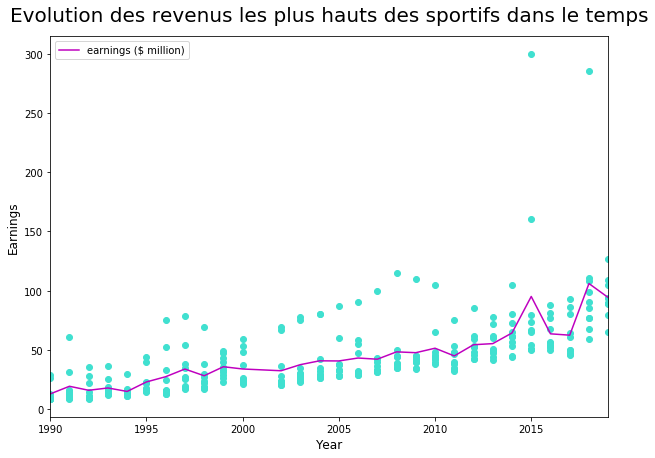

In [205]:
#Traçons le graphe de l'évolution du revenu des joueurs dans le temps

plt.figure(figsize=(10,7))
plt.scatter(df_ev['Year'],df_ev['earnings ($ million)'], color='turquoise')
plt.title('Evolution des revenus les plus hauts des sportifs dans le temps', fontsize=20, pad=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Earnings', fontsize=12)
df_ev.groupby('Year').mean()['earnings ($ million)'].plot(color='m') #On ajoute la droite des revenus moyens par année
plt.legend(frameon=True)
plt.show()

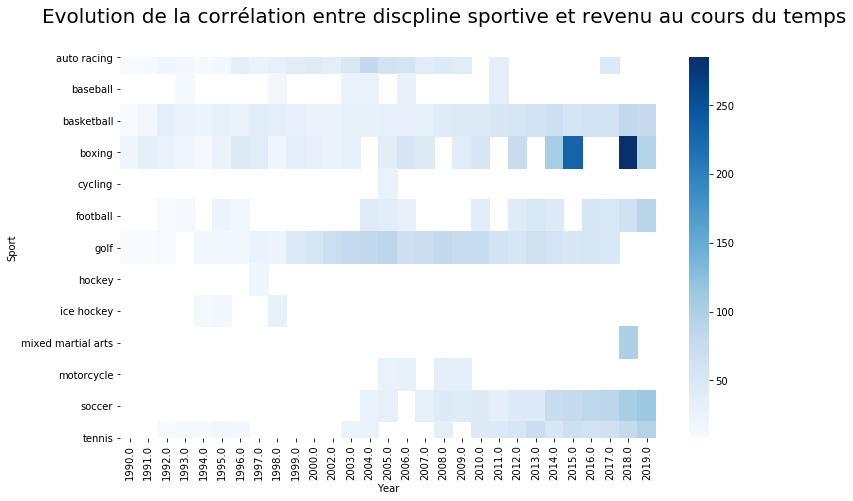

In [206]:
#On dessine une heatmap pour visualiser l'évolution de l'importance des disciplines sportives au cours dans années

heatmap1 = pd.pivot_table(df_ev, values='earnings ($ million)', 
                     index=['Sport'], 
                     columns='Year')

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap1, cmap="Blues")
plt.gcf().suptitle('Evolution de la corrélation entre discpline sportive et revenu au cours du temps', fontsize=20)
plt.show()

Ainsi, les plus hauts salaires sportifs ont évolué au cours de la période, ils se passés en moyenne de 20 millions en 1990 à 80 millions environ en 2019 : ils ont donc été multipliés par un facteur 4 en 20 ans. Cette augmentation a été progressive et régulière jusqu'en 2013 environ puis elle s'est accentuée tout en s'accompagnant d'à-coups au gré de la présence de contrats monumentaux, en particulier pour le boxeur Mayweather. Au fil du temps, en effet, on voit de plus en plus de points s'envoler vers des salaires bien plus élevés que les autres, qui témoignent peut-être d'un phénomène d'athlètes "idoles" qui deviennent quasiment des marques à eux tout seuls. 

De plus, la répartition des sports dans les classements a évolué: si la boxe, le basketball et le golf sont présents tout au long de la période avec de hauts niveaux de revenus, la course automobile semble avoir perdu du terrain tandis que le tennis (qui connaît une période intense avec quelques joueurs extrêmement performants) et le soccer (discipline qui a récemment explosé en terme de popularité et de rémunération des joueurs) remonte dans les classements. 

**On s'intéresse à présent uniquement au classement 2020 des 100 athlètes les mieux rémunérés, qui contient davantage de variables donc davantage de possibilités pour notre analyse**


In [207]:
#On récupère la base de données

dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\Projet_Sportifs\\Base 2020.csv', 'r')
reader = csv.DictReader(dfile, delimiter=';')
df_2020 = pd.read_csv(dfile)
df_2020


,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country
0,Roger Federer,1,106.3,6.3,Tennis,1,8.000,Switzerland
1,Cristiano Ronaldo,2,105.0,60.0,Soccer,1,244.000,Portugal
2,Lionel Messi,3,104.0,72.0,Soccer,1,170.000,Argentina
3,Neymar,4,95.5,70.5,Soccer,1,143.000,Brazil
4,LeBron James,5,88.2,28.2,Basketball,1,74.800,USA
...,...,...,...,...,...,...,...,...
95,Bradley Beal,96,22.3,20.3,Basketball,1,1.200,USA
96,Cam Newton,97,22.2,16.7,Football,1,4.900,USA
97,Calais Campbell,98,22.1,22.0,Football,1,0.161,USA
98,Derek Carr,99,22.0,20.0,Football,1,0.716,USA


In [176]:
#Cherchons les femmes présentes dans le classement (codées par 0 dans la variable 'Male')

print(df_2020[['Name','Sport']][df_2020['Male'] == 0])

               Name   Sport
28      Naomi Osaka  Tennis
32  Serena Williams  Tennis


Sans surprise, le classement ne comprend que deux femmes: on voit que les salaires des hommes sont encore très largement supérieur à ceux des femmes dans le domaine du sport. Les deux seules femmes du classement sont des joueuses de tennis, l'un des sports dont le circuit féminin a été popularisée le plus tôt. 

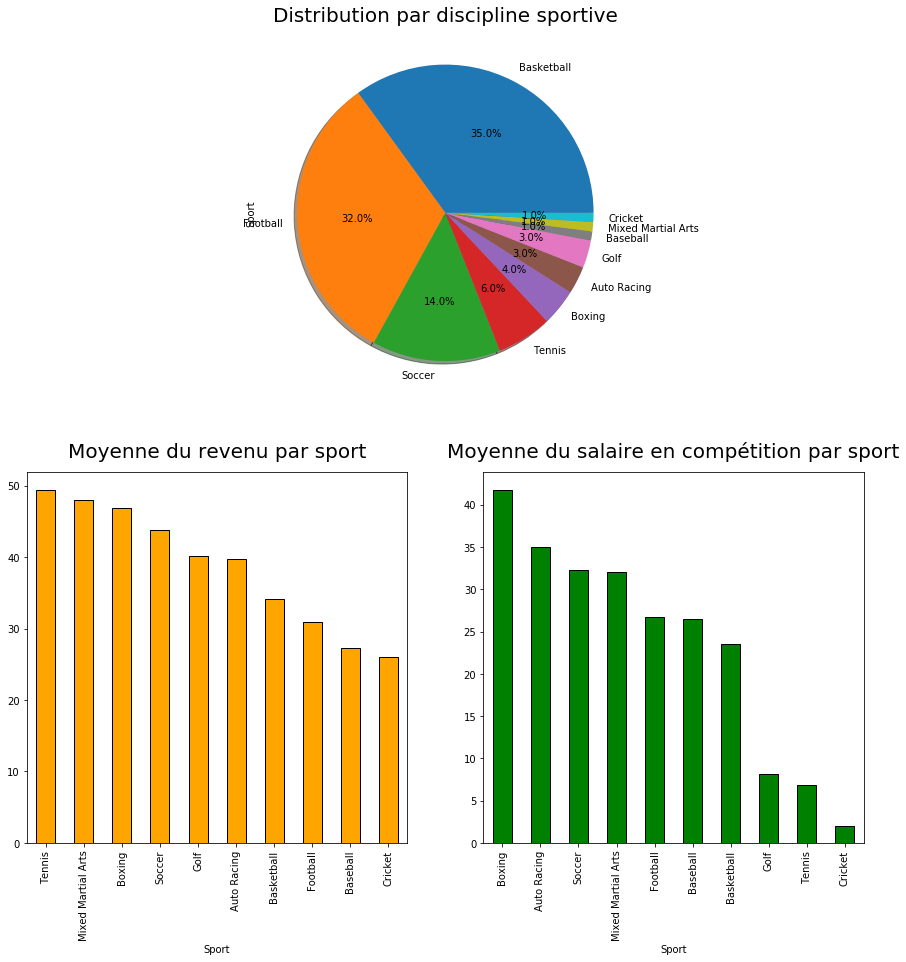

In [191]:
#On représente une vue d'ensemble de nos données par rapport aux disciplines sportives

plt.figure(figsize=(15, 15))
plt.subplot(211)
df_2020["Sport"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Distribution par discipline sportive', fontsize = 20)
plt.subplot(223)
df_2020.groupby('Sport').mean()['earnings'].sort_values(ascending = False).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Moyenne du revenu par sport', fontsize=20, pad=15)
#On distingue le revenu du salaire qui correspond à la partie du revenu gagnée en compétition et non grâce à des contrats publicitaires ou autres
plt.subplot(224)
df_2020.groupby('Sport').mean()['Salary/Winnings'].sort_values(ascending = False).plot(kind='bar', color='green', edgecolor='black')
plt.title('Moyenne du salaire en compétition par sport', fontsize = 20, pad=15)
plt.show()



Le renversement du classement lorsque l'on prend en compte le salaire gagné en compétition est assez impressionnant : 
* La boxe, le course automobile et le soccer sont extrêmement bien rémunérés pour les athlètes les plus performants
* Le tennis en particulier est environ 6 fois moins rémunérés mais ses stars sont particulièrement populaires et jouissent de contrats publicitaires et de sponsors extrêmement lucratifs

C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ 

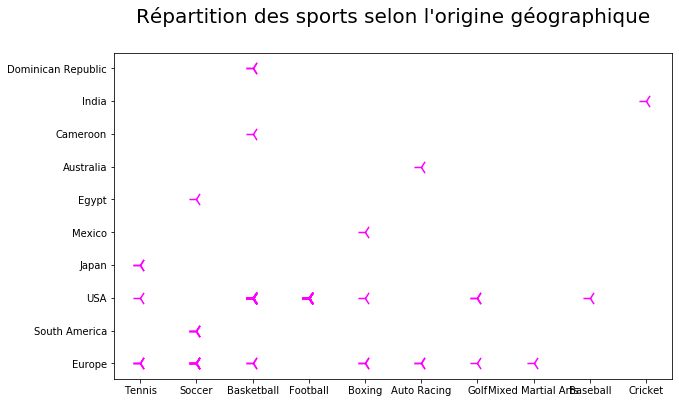

In [208]:
#On recode la variable du pays pour prendre en compte la zone géographique plus largement

df_2020['geo zone'] = 1

for i in range(100):
    if df_2020['Country'][i] in ['France', 'Germany', 'UK', 'Portugal', 'Spain', 'Switzerland', 'Greece', 'Latvia', 'Serbia', 'Ireland']:
        df_2020['geo zone'][i]='Europe'
    elif df_2020['Country'][i] in ['Brazil', 'Chile', 'Argentina']:
        df_2020['geo zone'][i]='South America'
    else:
        df_2020['geo zone'][i]=df_2020['Country'][i]

#On représente l'importance des différents sports par zone géographique

plt.figure(figsize=(10, 6))
plt.scatter(df_2020['Sport'], df_2020['geo zone'], c='magenta', marker='3', s=200)
plt.title('Répartition des sports selon l\'origine géographique', fontsize=20, pad=30)
plt.show()

On voit clairement que les Etats-Unis et l'Europe sont les deux zones géographiques les plus représentés et que les différentes disciplines sont caractéristiques de certaines zones : le football américain et le basketball pour les Etats-Unis, le soccer et le tennis pour l'Europe et l'Amérique du Sud entre autres. 

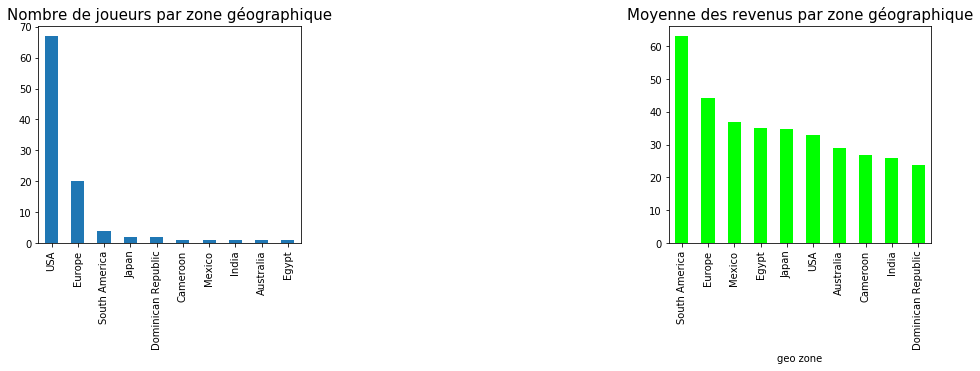

In [165]:
#Quelques statistiques par zone géographique, représentatives de ce que l'on a vu de la répartition des sports dans ces zones

plt.figure(figsize=(16, 4))
plt.subplot(131)
df_2020['geo zone'].value_counts().plot(kind='bar')
plt.title('Nombre de joueurs par zone géographique', fontsize=15)
plt.subplot(133)
df_2020.groupby('geo zone').mean()['earnings'].sort_values(ascending=False).plot(kind='bar', color='lime')
plt.title('Moyenne des revenus par zone géographique', fontsize=15)
plt.show()

Enfin, on s'intéresse à d'autres composantes du succès des athlètes hors du domaine strict de leurs performances, comme leur image, leur popularité et leur influence, qui peuvent leur assurer d'importants revenus grâce aux contrats publicitaires.

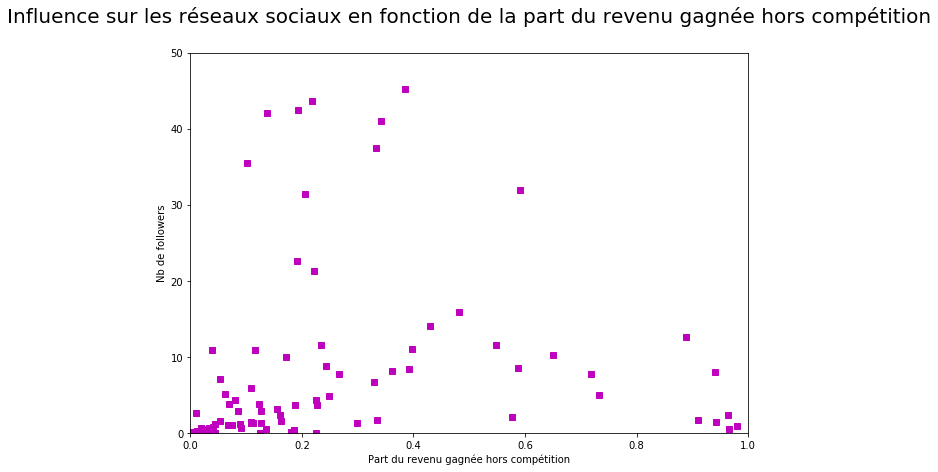

In [110]:
#Représentons la relation entre l'influence des joueurs sur les réseaux sociaux et le montant de leurs contrats publicitaires

plt.figure(figsize=(10, 7))
plt.plot(1-(df_2020['Salary/Winnings']/df_2020['earnings']), df_2020['Followers on Instagram (M)'], "ms")
plt.title('Influence sur les réseaux sociaux en fonction de la part du revenu gagnée hors compétition', fontsize = 20, pad=30)
plt.xlabel('Part du revenu gagnée hors compétition')
plt.ylabel('Nb de followers')
plt.axis([0, 1, 0, 50])
plt.show()

Visuellement on ne peut pas vraiment conclure sur une éventuelle corrélation entre ces variables, on y reviendra de manière plus précise dans la 3ème partie, consacrée aux régressions. 

### 2) Web scraping et constitution de notre base complète


On souhaite à présent avoir une base plus complète, avec davantage de variables chiffrées afin d'exercer des modèles de régression et de trouver des variables explicatives du succès dans le sport. 

In [209]:
import urllib
import bs4
import collections

Pour commencer, nous récupérons la date de naissance et la taille de chaque joueur sur sa page Wikipédia.

In [210]:
#On crée une nouvelle base avec les noms des joueurs sous la forme qu'ils prennent dans l'url wikipédia

df_2020_c = df_2020.copy()
df_2020_c = pd.DataFrame(df_2020_c.Name.str.replace(' ', '_'))
df_2020_c.columns = ['Name_1']
df_2020_c['Name']=df_2020['Name']

#On enlève à la main les joueurs qui n'ont pas de page wikipédia française 
#On modifie le nom de certains pour qu'il corresponde à leur url wikipédia

df_2020_c.drop(38,0,inplace=True) #Michael Thomas
df_2020_c.iat[42,0]='Anthony_Davis_(basket-ball)'
df_2020_c.iat[54,0]='Oscar_(football)'
df_2020_c.iat[60,0]='Devin_Booker_(basket-ball,_1996)'
df_2020_c.iat[62,0]='D%27Angelo_Russell'
df_2020_c.iat[69,0]='Mike_Conley,_Jr.'
df_2020_c.drop(85,0,inplace=True) #Shaq Thompson
df_2020_c.drop(93,0,inplace=True) #DJ Reader


In [211]:
# Récupération de la taille et de l'âge de chaque joueur sur sa page wikipédia


#Fonction pour accéder à la page d'un joueur

def get_page(player_name):
    url_wiki_player = 'https://fr.wikipedia.org/wiki/'+ player_name
    req = urllib.request.Request(url_wiki_player)
    html = urllib.request.urlopen(req).read()
    return bs4.BeautifulSoup(html, "lxml")

#Fonction pour récupérer les informations une fois sur la page du joueur

def get_feat_player(player_name):
    page = get_page(player_name)
    data = collections.defaultdict()
    tableau = page.find('table', {'class': 'infobox_v2'})
    tableau1 = page.find('div', {'class': 'infobox_v3'})
    tableau2 = page.find('div', {'class': 'infobox_v3 bordered'}) #les tableaux wikipédia peuvent être codés de ces 3 manières
    height = 0
    
    #On va chercher la date de naissance grâce à sa classe particulière

    if page.find('time', {'class': 'nowrap date-lien bday'}) is not None:
        date = page.find('time', {'class': 'nowrap date-lien bday'}).get('datetime')
    else:
        date = page.find('time', {'class': 'nowrap date-lien'}).get('datetime') #la date peut être codée de ces deux manières
    
    #On va chercher la ligne du tableau des caractéristiques du joueur qui correspond à sa taille
    
    if tableau is not None:
        for feat2 in tableau.findAll('tr'):
            if feat2.find('th') is not None:
                if feat2.find('th').getText() == 'Taille\n':
                    height = feat2.find('td').getText().replace('\n','')
    elif tableau1 is not None:
        for feat4 in tableau1.findAll('tr'):
            if feat4.find('th') is not None:
                if feat4.find('th').getText() == 'Taille\n':
                    height = feat4.find('td').getText().replace('\n','')
    elif tableau2 is not None:
        for feat6 in tableau1.findAll('tr'):
            if feat6.find('th') is not None:
                if feat6.find('th').getText() == 'Taille\n':
                    height = feat6.find('td').getText().replace('\n','')        
 

    data['Birth'] = date
    data['Height'] = height
    data['Name_1'] = player_name
    return dict(data)

# On exécute ces fonctions pour chaque joueur et on crée une base de donnée avec ces informations

items = []       
for player in df_2020_c.iloc[0:100, 0] : 
    item = get_feat_player(player)       
    items.append(item)
    
df_bh = pd.DataFrame(items)
df_bh.head()

,Birth,Height,Name_1
0,1981-08-08,"1,85 m (6′ 1″)",Roger_Federer
1,1985-02-05,"1,87 m (6′ 2″)[1]",Cristiano_Ronaldo
2,1987-06-24,"1,70 m (5′ 7″)[2]",Lionel_Messi
3,1992-02-05,"1,75 m (5′ 9″)[1]",Neymar
4,1984-12-30,"2,06 m (6′ 9″)[1]",LeBron_James


On obtient beaucoup de tailles qui valent 0 parce que les tableaux wikipédia ont des encodages différents selon la page donc on n'a pas réussi à toutes les scraper.

In [212]:
#On récupère les noms normaux des joueurs pour pouvoir joindre cette base à notre base initiale
dfm_bh = pd.merge(df_bh,df_2020_c)

#On ajoute à la main les trois joueurs sans page wikipédia française
dfm_bh.loc[97] = ['1993-03-03', '1,91 m', 'Michael_Thomas', 'Michael Thomas']
dfm_bh.loc[98] = ['1994-04-21', '1,83 m', 'Shaq_Thompson', 'Shaq Thompson']
dfm_bh.loc[99] = ['1994-07-01', '1,91 m', 'D._J._Reader', 'D. J. Reader']


In [264]:
#On crée une variable Age calculée à partir des dates de naissance grâce au module datetime

from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

dfm_bh['Age'] = 1 #On crée la colonne Age

#Pour chaque joueur on calcule son âge et on récupère uniquement la taille en mètre qu'on convertit en float

for i in range(100):
    dfm_bh['Age'][i] = calculate_age(datetime.strptime(dfm_bh['Birth'][i], "%Y-%m-%d"))  
    if dfm_bh['Height'][i] != 0:
        dfm_bh['Height'][i] = dfm_bh['Height'][i][0:4]
        dfm_bh['Height'][i] = dfm_bh['Height'][i].replace(',','.')
        dfm_bh['Height'][i] = float(dfm_bh['Height'][i])
        
dfm_bh['Age'][dfm_bh['Name']=='Clayton Kershaw'] =32 #la date de naissance de ce joueur a été mal codée      

#On fait la jointure entre la base obtenue et notre base de départ
df_2020_bh = pd.merge(df_2020,dfm_bh)

df_2020_bh.head()


C:\Users\Clémence Millet\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: 'float' object is not subscriptable

Enfin, pour compléter notre base de données, on récupère des variables chiffrées sur les pays et sur les différentes discplines sportives qui nous intéressent.


In [214]:
#On récupère la base de données sport avec pour chaque discipline une estimation du nombre de "fans"
dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Base Sports.csv', 'r')
reader = csv.DictReader(dfile, delimiter=',')
df_sports = pd.read_csv(dfile)

#On récupère la base de données pays avec les PIB de 2018 et la population
dfile = open('C:\\Users\\Clémence Millet\\Documents\\GitHub\\Projet_Sportifs\\Base pays.csv', 'r')
reader = csv.DictReader(dfile, delimiter=',')
df_pays = pd.read_csv(dfile)

#On joint la base des sports avec notre base générale
df_2020_bis = pd.merge(df_2020_bh,df_sports)

#Même jointure avec la base des pays
dfm_2020 = pd.merge(df_2020_bis,df_pays)

#On ajoute la variable Endorsements qui correspond à la partie du revenu hors compétition sportive
dfm_2020['Endorsements']= dfm_2020['earnings']-dfm_2020['Salary/Winnings']

dfm_2020.head()


,Name,Rank,earnings,Salary/Winnings,Sport,Male,Followers on Instagram (M),Country,geo zone,Birth,Height,Name_1,Age,Nb of fans estimated,GDP (Mds),Population (M),Impact Covid,Endorsements
0,Roger Federer,1,106.3,6.3,Tennis,1,8.0,Switzerland,Europe,1981-08-08,1.85,Roger_Federer,39,1.0,706,9,0.0,100.0
1,Novak Djokovic,23,44.6,12.6,Tennis,1,7.8,Serbia,Europe,1987-05-22,1.88,Novak_Djokovic,33,1.0,51,7,0.0,32.0
2,Rafael Nadal,27,40.0,14.0,Tennis,1,10.3,Spain,Europe,1986-06-03,1.85,Rafael_Nadal,34,1.0,1426,47,12.8,26.0
3,Andres Iniesta,46,29.6,26.6,Soccer,1,35.5,Spain,Europe,1984-05-11,1.7,Andres_Iniesta,36,4.0,1426,47,12.8,3.0
4,David De Gea,67,25.7,22.7,Soccer,1,11.0,Spain,Europe,1990-11-07,1.92,David_De_Gea,30,4.0,1426,47,12.8,3.0


### 3) Analyse des données et régressions

In [60]:
import scipy

On s'intéresse maintenant plus précisément aux variables qui ont une forte corrélation avec le succès d'un joueur, à travers son revenu, son salaire en compétition ou encore sa popularité sur les réseaux sociaux, pour trouer les caractéristiques qui peuvent nous permettre de prédire un plus ou moins grand succès pour l'athlète.

**Tout d'abord, on étudie la corrélation entre le salaire des joueurs et leurs caractéristiques physiologiques : la taille et l'âge.**

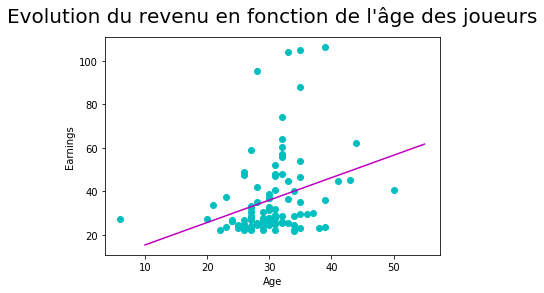

LinregressResult(slope=1.0315348761584737, intercept=4.9881239499214125, rvalue=0.3038920989129897, pvalue=0.002113838724611679, stderr=0.32667099693154616)

In [222]:
#On effectue la régression linéaire simple du revenu sur l'âge du joueur avec le module scipy
lra = stats.linregress(dfm_2020['Age'], dfm_2020['earnings'])

#On représente le graphe de cette relation 
plt.plot(dfm_2020['Age'], dfm_2020['earnings'], 'co')
x = np.linspace(55, 10, 100)
y = lra.slope*x + lra.intercept #on ajoute la droite de régression
plt.plot(x, y, 'm')
plt.title('Evolution du revenu en fonction de l\'âge des joueurs', fontsize=20, pad=15)
plt.xlabel('Age')
plt.ylabel('Earnings')
plt.show()
lra

On remarque que la relation entre ces deux variables est positive, comme le montre le signe positif du coefficient directeur de la droite de régression. La p-value est très faible : le coefficient est donc significatif au seuil de 1% et il prédit une hausse d'environ 1 million de dollars de revenu lorsqu'un joueur gagne un an.
On voit cependant sur le graphe que les points sont assez éloignés de la droite de régression donc même si l'on peut dire qu'en général, plus un joueur avance en âge, plus son revenu augmente, l'âge ne permet pas non plus de prédire très précisément le succès d'un athlète. 

Comme, d'après ce graphe, la relation entre l'âge et le revenu semble être plus exponentielle que linéaire, on tente une régression polynômiale de degré 2 pour essayer de mieux approcher les points :

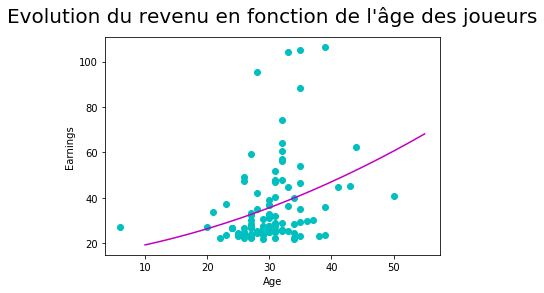

In [223]:
#Régression polynômiale de degré 2 du revenu sur l'âge

lpa = np.polyfit(dfm_2020['Age'], dfm_2020['earnings'], 2)

plt.plot(dfm_2020['Age'], dfm_2020['earnings'], 'co')
x = np.linspace(55, 10, 100)
y = lpa[0]*x**2 + lpa[1]*x + lpa[2] #on ajoute la courbe de la régression
plt.plot(x, y, 'm')
plt.title('Evolution du revenu en fonction de l\'âge des joueurs', fontsize=20, pad=15)
plt.xlabel('Age')
plt.ylabel('Earnings')

plt.show()


La courbe semble légèrement plus proche des points que la droite de régression et elle montre qu'à partir d'un certain âge, le revenu peut augmenter beaucoup plus rapidement. Cela paraît cohérent puisqu'un athlète en milieu/fin de carrière sera mieux entraîné, probablement plus régulier, plus sûr pour un club ou une équipe nationale, et aura pu gagner une certaine notoriété qui peut lui valoir des contrats publicitaires importants. 

On veut maintenant savoir si cette corrélation entre revenu et âge est différente selon la discipline sportive : 

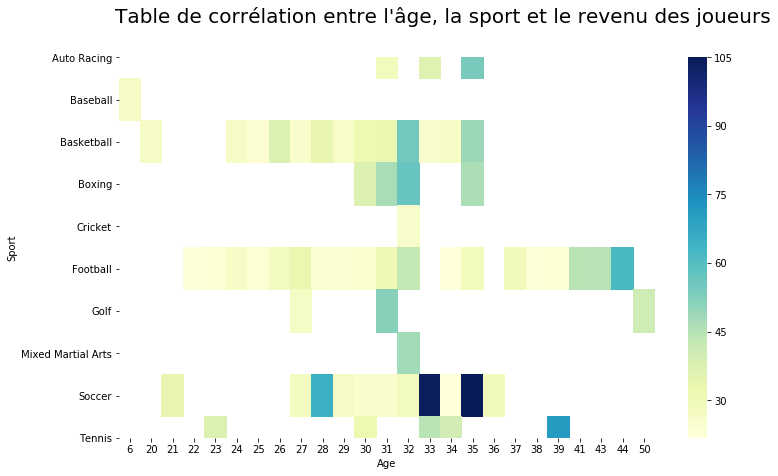

In [227]:
#On trace une heatmap représentant les corrélations entre âge, sport et revenu

heatmap2 = pd.pivot_table(dfm_2020, values='earnings', 
                     index=['Sport'], 
                     columns='Age')

plt.figure(figsize=(12,7))
plt.gcf().suptitle('Table de corrélation entre l\'âge, la sport et le revenu des joueurs', fontsize=20)
sns.heatmap(heatmap2, cmap="YlGnBu")


On voit clairement que le football américain se détache: c'est **la** discipline dans laquelle les joueurs de plus de 35 ans peuvent toujours avoir des revenus très élevés. Globalement, dans toutes les discplines, il est très difficile d'avoir un revenu extrêmement élevé jusqu'à 25 ans. Ensuite, en général les revenus augmentent avec l'âge, ce qui est surtout visible en tennis et en football américain. 

On s'intéresse à présent à l'effet de la taille sur les revenus. Comme on suppose qu'elle n'a aucune corrélation avec la notoriété des joueurs hors compétition, on ne s'intéresse qu'à son effet sur le salaire des athlètes. Et puisque notre colonne 'Height' contient beaucoup de valeur nulle du fait de la difficulté de scraper les différentes page wikipédia, on n'effectue pas de régression linéaire précise, mais on trace simplement une table de corrélation.

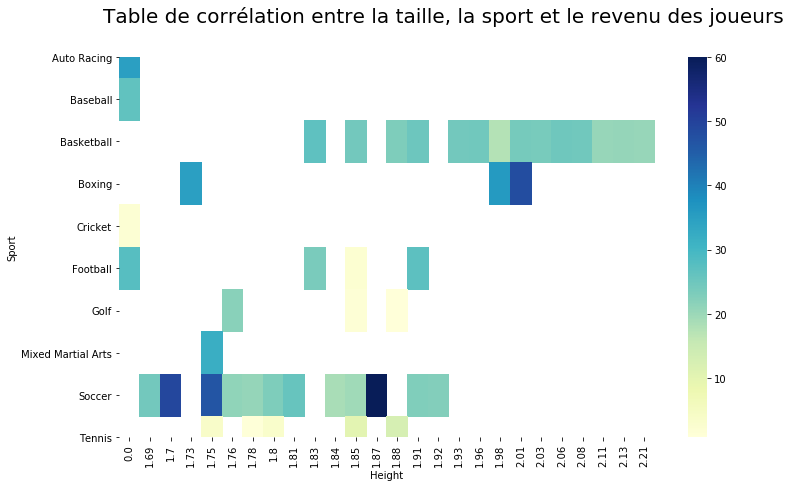

In [228]:
#On trace une heatmap pour chercher une corrélation entre la taille des athlètes, leur discipline et leur salaire
heatmap3 = pd.pivot_table(dfm_2020, values='Salary/Winnings', 
                     index=['Sport'], 
                     columns='Height')

plt.figure(figsize=(12,7))
plt.gcf().suptitle('Table de corrélation entre la taille, la sport et le revenu des joueurs', fontsize=20)
sns.heatmap(heatmap3, cmap="YlGnBu")

On remarque qu'une haute taille est sans aucun doute un facteur majeur de la réussite en basketball, mais dans les autres disciplines, la taille ne semble pas réellement avoir de poids sur le revenu des joueurs. 

**On cherche à présent à savoir si l'origine du sportif a une influence sur ses performances et son succès:**

In [236]:
#On crée une base avec le nombre de joueurs présents dans le classement par pays et la population de chaque pays

dfc = dfm_2020[['Country', 'Population (M)']].groupby('Country').agg(['count', 'mean'])
dfc.columns = ['Nb of players', 'Population']

#On cherche une éventuelle corrélation entre le fait pour un pays d'avoir un grand nombre de joueur très bien rémunérés et la population du pays

lrpop = stats.linregress(dfc['Population'], dfc['Nb of players'])
lrpop

LinregressResult(slope=0.007233148888628533, intercept=3.830206297917134, rvalue=0.1498688025419315, pvalue=0.5167203616037992, stderr=0.010947286637227797)

In [235]:
#On crée une base avec le nombre de joueurs présents dans le classement par pays et le PIB de chaque pays

dfc1 = dfm_2020[['Country', 'GDP (Mds)']].groupby('Country').agg(['count', 'mean'])
dfc1.columns = ['Nb of players', 'GDP avg']

#On cherche une éventuelle corrélation entre la richesse d'un pays et la fait d'avoir des joueurs dans le classement

lrgdp = stats.linregress(dfc1['GDP avg'], dfc1['Nb of players'])
lrgdp


LinregressResult(slope=0.003094450880993145, intercept=-2.0980507768454695, rvalue=0.9564040108123968, pvalue=1.311894300336487e-11, stderr=0.00021677936737970414)

En faisait la régression du revenu des joueurs sur le PIB on obtenait un coefficient estimé négatif, ce qui semble déraisonnable. En effet, cette régression n'est pas adéquate puisque si un pays n'est représenté que par un joueur dont le revenu est monumental, mais dont le PIB n'est pas très important par rapport à celui des USA par exemple, cela va fausser les résultats. On choisit donc de faire la régression sur le nombre de joueurs présent dans le classement par pays.

On observe que la population du pays joue assez peu sur ce nombre : le coefficient de corrélation est à 0.15, ce qui est faible et le coefficient n'est pas significatif donc on ne peut pas l'interpréter. 
En revanche, le PIB joue beaucoup : le coefficient de corrélation est de 0.96, ce qui est extrêmement élevé, et la p-valeur est très faible donc le coefficient trouvé est significatif. On peut donc s'attendre, en moyenne et toutes choses égales par ailleurs, à une hausse de 3 joueurs dans le classement pour un pays dont le PIB augmente de 1000 milliards. 

Ce sont donc les pays les plus riches, et non les plus peuplés qui ont le plus grand nombre de sportifs extrêmement performants et populaires. Il y a donc un facteur de formation, d'infrastructure et de visibilité important. 

**Pour finir, on s'intéresse aux variables qui n'ont pas d'effet direct sur les performances sportives des joueurs mais sur leur succès par le biais de leur notoriété :**

In [238]:
#On regarde la corrélation entre la notoriété sur les réseaux sociaux et les revenus hors compétition
lrfi = stats.linregress(dfm_2020['Followers on Instagram (M)'], dfm_2020['Endorsements'])

#On cherche une éventuelle corrélation entre la popularité et la visibilité des sports et la notoriété sur les réseaux
lrf = stats.linregress(dfm_2020['Nb of fans estimated'], dfm_2020['Followers on Instagram (M)'])

print(lrfi)
print(lrf)

LinregressResult(slope=0.1702583061419825, intercept=8.588314881009506, rvalue=0.3663696659534672, pvalue=0.00017764112954131008, stderr=0.043679519084564376)
LinregressResult(slope=9.663410957708232, intercept=-4.150167995021352, rvalue=0.4038307245363947, pvalue=3.094174796111281e-05, stderr=2.211363922465805)


Text(0.5, 1, 'Influence sur les réseaux sociaux en fonction de la notoriété du sport')

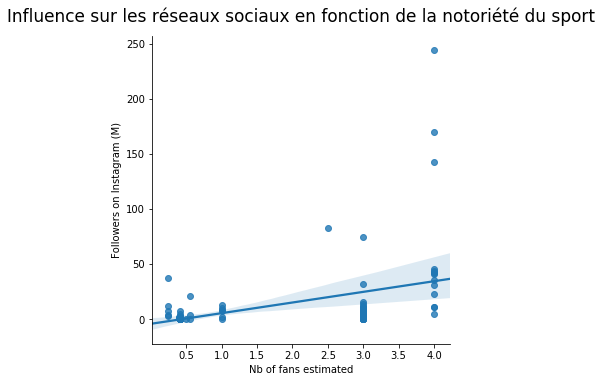

In [251]:
#On trace le graphe du nombre de followers du sportif en fonction de la popularité de son sport avec la droite de régression

sns.lmplot(x="Nb of fans estimated", y="Followers on Instagram (M)", data=dfm_2020)
plt.title('Influence sur les réseaux sociaux en fonction de la notoriété du sport', fontsize=17, pad=15)


Pour les deux régressions, les coefficients de corrélation sont assez élevés (autour de 0.4), ce qui nous indique que la notoriété de la discipline sportive est assez corrélée à l'influence sur les réseaux sociaux, elle-même liée au revenu dû aux contrats publicitaires et au sponsoring. 
Les deux coefficients étant positifs et les p-valeurs très faibles, on peut affirmer qu'il y a bien un certain effet positif entre toutes ces variables. Il semble en effet logique qu'un sportif disposant d'une grande visibilité et d'un grand nombre de supporters acquiert des followers et attire les contrats publicitaires puisqu'il devient un bon client "influenceur". 

**Voyons maintenant l'influence des revenus hors compétitions dans le revenu total :**

In [260]:
#On cherche quel part du revenu explique le mieux le revenu total
lre = stats.linregress(dfm_2020['Endorsements'], dfm_2020['earnings'])
lrs = stats.linregress(dfm_2020['Salary/Winnings'], dfm_2020['earnings'])
lres = stats.linregress(dfm_2020['Endorsements'], dfm_2020['Salary/Winnings'])

print(lre)
print('\n')
print(lrs)
print('\n')
print(lres)

LinregressResult(slope=0.8621227930809442, intercept=26.77240994224669, rvalue=0.7498165751449075, pvalue=2.8070259977151416e-19, stderr=0.07684694067484182)


LinregressResult(slope=0.7693375367756061, intercept=16.78876448351141, rvalue=0.5173215946792835, pvalue=3.5671404721831815e-08, stderr=0.12856152966403078)


LinregressResult(slope=-0.13787720691905536, intercept=26.77240994224669, rvalue=-0.17833422602083063, pvalue=0.0758681078549302, stderr=0.0768469406748418)


On voit de manière assez surprenant, que la corrélation entre les 'Endorsements' et le revenu global est plus importante que celle entre le salaire des joueurs et leur revenu global. Ainsi, la part la plus représentative du succès des sportifs seraient la part de leur revenu qu'ils gagnent grâce à leur image, leur notoriété, leurs sponsors et non leur rémunération pour les compétitions. Ceci dit, les deux corrélations restent logiquement élevés et assez proches et les deux coefficients ne sont pas très éloignés de 1. Mais la corrélation entre le revenu hors compétition et la salaire est très faible, avec une valeur absolue inférieure à 0.18, et le coefficient, bien que significatif qu'à 10% indique une possible relation négative entre les deux. 

Ainsi, pratiquer un sport très bien rémunéré et avoir un revenu et une notoriété très importants sont deux choses différentes et pas forcément liées. 

**Pour terminer et en guise de vue d'ensemble de ce que l'on a étudié, on effectue une régression multiple du revenu sur les variables principales :**

In [261]:
X = dfm_2020[["Followers on Instagram (M)", "Endorsements", "Age", "GDP (Mds)"]]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = dfm_2020["earnings"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     61.21
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.79e-25
Time:                        00:25:04   Log-Likelihood:                -369.63
No. Observations:                 100   AIC:                             749.3
Df Residuals:                      95   BIC:                             762.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [262]:
print(dfm_2020[['Name','Birth']][dfm_2020['Age'] ==6])
#print(df_2020[['Name','Sport']][df_2020['Male'] == 0])

               Name       Birth
74  Clayton Kershaw  2014-06-18


### Principaux résultats de la partie : 

Pour faire partie des joueurs les mieux rémunérés du monde, il faut d'abord être un sportif extrêmement performant. Ces performances s'expliquent par des formations de haut niveau, des infrastructures adaptées et une grande visibilité, c'est-à-dire par un pays d'origine souvent riche. Il faut également avoir acquis une certaine expérience donc ne pas être trop jeune (au-delà de 25 ans au moins). Enfin, cela demande des capacités physiques donc notamment une taille minimale (vers 1,70m) mais au-delà de ce seuil, la taille ne joue plus vraiment (excepté pour des disciplines spécifiques comme le basketball).

Mais de grandes performances sportives ne suffisent pas à garantir le succès d'un athlète. Une grande part, si ce n'est la plus importante, de leurs revenus proviennent d'origines extérieures aux compétitions: les publicités, les sponsors, etc. Ce qui explique principalement la notoriété de certains athlètes, c'est d'abord la popularité de leur sport et l'engouement qu'il sucite (en particulier pour le soccer, qui compte des milliars de fans dans le monde), mais aussi une certaine longévité de carrière et une image particulièrement attirante, qui peut passer par un immense succès sur les réseaux sociaux. 

Enfin, on remarque que certains athlètes peuvent profiter au contraire d'une lacune de leur pays en terme de nombre de sportifs dans leur discipline, en devenant une icône nationale malgré des performances par forcément majeures. C'est le cas par exemple des deux joueurs de tennis japonais du classement: Naomi Osaka et Kei Nishikori. Ici, c'est donc vraiment l'image et les contrats publicitaires qui joue un rôle majeur dans leur présence dans ce classement.

Les données sur lesquelles on a travaillé sont limitées à 100 observations et qui sont déjà tous des sportifs de très grand succès donc aux caractéristiques assez proches, mais les résultats obtenus semblent tout de même assez en accord avec la réalité. 

